### OCI Data Science - Useful Tips
<details>
<summary><font size="2">Check for Public Internet Access</font></summary>

```python
import requests
response = requests.get("https://oracle.com")
assert response.status_code==200, "Internet connection failed"
```
</details>
<details>
<summary><font size="2">Helpful Documentation </font></summary>
<ul><li><a href="https://docs.cloud.oracle.com/en-us/iaas/data-science/using/data-science.htm">Data Science Service Documentation</a></li>
<li><a href="https://docs.cloud.oracle.com/iaas/tools/ads-sdk/latest/index.html">ADS documentation</a></li>
</ul>
</details>
<details>
<summary><font size="2">Typical Cell Imports and Settings for ADS</font></summary>

```python
%load_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import logging
logging.basicConfig(format='%(levelname)s:%(message)s', level=logging.ERROR)

import ads
from ads.dataset.factory import DatasetFactory
from ads.automl.provider import OracleAutoMLProvider
from ads.automl.driver import AutoML
from ads.evaluations.evaluator import ADSEvaluator
from ads.common.data import ADSData
from ads.explanations.explainer import ADSExplainer
from ads.explanations.mlx_global_explainer import MLXGlobalExplainer
from ads.explanations.mlx_local_explainer import MLXLocalExplainer
from ads.catalog.model import ModelCatalog
from ads.common.model_artifact import ModelArtifact
```
</details>
<details>
<summary><font size="2">Useful Environment Variables</font></summary>

```python
import os
print(os.environ["NB_SESSION_COMPARTMENT_OCID"])
print(os.environ["PROJECT_OCID"])
print(os.environ["USER_OCID"])
print(os.environ["TENANCY_OCID"])
print(os.environ["NB_REGION"])
```
</details>

In [1]:
import ads

print(ads.__version__)

2.11.9


In [2]:
import ads
import pandas as pd

ads.set_auth("resource_principal")

In [3]:
!pip install pyxlsb

  Using cached pyxlsb-1.0.10-py2.py3-none-any.whl.metadata (2.5 kB)
Using cached pyxlsb-1.0.10-py2.py3-none-any.whl (23 kB)


In [4]:
bucket_name = "HROps"
namespace = "gc35013"


file_name = "AI-ML Data Input for FY22 , FY23 and FY24(Q1Q2) 12Dec2023.xlsb"
df = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
engine = 'pyxlsb')

In [5]:
df.head()

,Fiscal Year,Qtr,Consultant Mail ID,Control,E/C,Level,Manager,Pillar,Capacity Hours,Billable Hours,Domain 1,Domain 1.1,Resource Primary Skill,Secondary Primary Skill
0,FY-22,Q1,a.aasik@oracle.com,FY-22Q1a.aasik@oracle.comC,C,C,jitendra.js.singh@oracle.com,CX Retail,520.0,432.0,App,CX,Global/CX/Technical Consultant,Global-R2/CX/Integration
1,FY-22,Q1,a.abhinav.s.sharma@oracle.com,FY-22Q1a.abhinav.s.sharma@oracle.comE,E,2,nitin.singh@oracle.com,CX Retail,520.0,504.0,App,CX,Global/CX/Technical Consultant,Global-R2/CX/Siebel/Data Migration(EIM)
2,FY-22,Q1,a.ashok.padmanaban@oracle.com,FY-22Q1a.ashok.padmanaban@oracle.comE,E,4,sreenivasa.venkatasubbarao@oracle.com,ERP SCM,280.0,192.0,App,SCM,Global/SCM/Functional Consultant,Global-R2/SCM/Procurement
3,FY-22,Q1,a.c.arun.thyagarajan@oracle.com,FY-22Q1a.c.arun.thyagarajan@oracle.comE,E,5,kishore.ludhani@oracle.com,ERP SCM,136.0,49.0,App,SCM,Global/SCM/Lead,Global-R2/SCM/Procurement
4,FY-22,Q1,a.rama.devi@oracle.com,FY-22Q1a.rama.devi@oracle.comE,E,4,anil.kumar.ragampeta@oracle.com,HCM,520.0,528.0,App,HCM,Global/HCM/Functional Consultant,Global-R2/HCM Cloud/Payroll/Functional


In [6]:
#store data from mutliple sheets to a variable
capacity = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Capacity')
billable = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Billable Days')
non_billable = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'NB Days')
new_joiner = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'New Joiners ')
exit = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'EXIT')
promotion_list = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Promotion List')
location = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Location')
t_d_grad = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'T&D and Grads')
act_emp = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Active Employee and Contractors')
ons_off = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Onsite Offshore details')
monthly_capacity = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Monthly Capacity')
allocation = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Allocation')
consultant = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Consultants in Same project')
utilization = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Ex GSD FY22 Utl Details')
sheet1 = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Sheet1')
sheet2 = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Sheet2')
sheet5 = pd.read_excel(
    f"oci://{bucket_name}@{namespace}/{file_name}",
    storage_options=ads.common.auth.default_signer(),
sheet_name = 'Sheet5')

In [7]:
type(capacity)

pandas.core.frame.DataFrame

In [8]:
query_result = capacity[capacity['Fiscal Year'] == 'FY-22'][['Consultant Mail ID','Level']]
print(query_result)

                           Consultant Mail ID Level
0                          a.aasik@oracle.com     C
1               a.abhinav.s.sharma@oracle.com     2
2               a.ashok.padmanaban@oracle.com     4
3             a.c.arun.thyagarajan@oracle.com     5
4                      a.rama.devi@oracle.com     4
...                                       ...   ...
29259  venkatanarayana.raju.adluru@oracle.com     C
29260                vigesh.bakula@oracle.com     C
29261            vineet.kumar.jain@oracle.com     C
29262  vinod.kumar.ponde.gopal.rao@oracle.com     C
29263           yedla.pragna.reddy@oracle.com     C

[11718 rows x 2 columns]


In [9]:
grouped_df = capacity.groupby(['Fiscal Year','Qtr']).count().reset_index()
print(grouped_df)

  Fiscal Year Qtr  Consultant Mail ID  Control   E/C  Level  Manager  Pillar  \
0       FY-22  Q1                2660     2660  2660   2660     2660    2660   
1       FY-22  Q2                2763     2763  2763   2763     2763    2763   
2       FY-22  Q3                2948     2948  2948   2948     2948    2948   
3       FY-22  Q4                3347     3347  3347   3347     3347    3347   
4       FY-23  Q1                4510     4510  4510   4510     4510    4510   
5       FY-23  Q2                4507     4507  4507   4507     4507    4507   
6       FY-23  Q3                4485     4485  4485   4485     4485    4485   
7       FY-23  Q4                4480     4480  4480   4480     4480    4480   
8       FY-24  Q1                8267     8267  8267   8267     8267    8267   
9       FY-24  Q2                 409      409   409    409      409     409   

   Capacity Hours  Billable Hours  Domain 1  Domain 1.1  \
0            2660            2660      2660        2660   
1

In [10]:
more_billable_filtered = capacity[capacity['Capacity Hours'] < capacity['Billable Hours']]
capacity_more_billable_grouped  = grouped_df.groupby(['Fiscal Year','Qtr'])['Consultant Mail ID'].count().reset_index()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


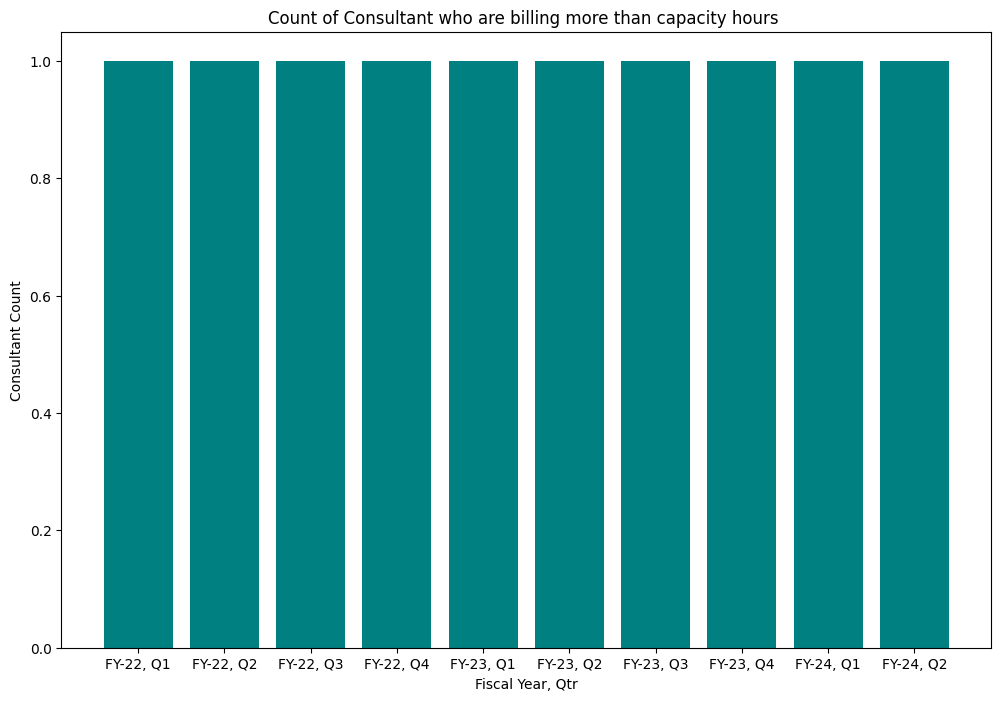

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.bar(capacity_more_billable_grouped['Fiscal Year'] + ', ' + grouped_df['Qtr'], capacity_more_billable_grouped['Consultant Mail ID'])
plt.xlabel('Fiscal Year, Qtr')
plt.ylabel('Consultant Count')
plt.title('Count of Consultant who are billing more than capacity hours ')
plt.legend().remove()  # Remove legend for better readability
plt.show() 

In [12]:
billable.head()

,Fiscal Year,Quarter,Month,Consultant Mail ID,Control,Project Number,Project Name,Work Type,Job Title,Level,...,Region,Sub Region,Cluster,Sub - Cluster,Pillar,Sub-Group,Domain1,Domain2,Hours,Days
0,FY-22,Q1,June,a.aasik@oracle.com,FY-22Q1a.aasik@oracle.comC,400155463,A3FFBM_TM_SD_Network Rail Infrastructure Limit...,CO-C Consulting Billable Projects Cost Transfer,8888.Contractor-Billable.N/A,C,...,EMEA Consulting Apps,UK-IE Consulting Apps,UK-IE Delivery,UK-IE Apps Delivery,CX Retail,Apps Delivery -RightNow,App,CX,152.0,19.0
1,FY-22,Q1,June,a.abhinav.s.sharma@oracle.com,FY-22Q1a.abhinav.s.sharma@oracle.comE,400129682,AQJ25_FP_JT International SA_TME Connect Italy...,CO-C Consulting Billable Projects Cost Transfer,20110.Associate Consultant.IC1,2,...,EMEA Consulting Apps,North Consulting Applications,DE-CH Consulting Apps,Apps Delivery - DE-CH,CX Retail,Apps Delivery -Fusion CRM,App,CX,40.0,5.0
2,FY-22,Q1,June,a.abhinav.s.sharma@oracle.com,FY-22Q1a.abhinav.s.sharma@oracle.comE,400152834,A3H8PD_TM_RM_BPCE SA_Move OCOD,CO-C Consulting Billable Projects Cost Transfer,20110.Associate Consultant.IC1,2,...,EMEA Consulting Apps,South Consulting Applications,France Consulting Apps,France Delivery Apps,CX Retail,Apps Delivery -Fusion CRM,App,CX,104.0,13.0
3,FY-22,Q1,June,a.ashok.padmanaban@oracle.com,FY-22Q1a.ashok.padmanaban@oracle.comE,300604351,JP/FPS/DENSO/G-FAST_PM_GT,CO-C Consulting Billable Projects Cost Transfer,20410.Senior Consultant.IC2,4,...,JAPAN,Japan,NaN,NaN,ERP SCM,SCM - SaaS,App,SCM,96.0,12.0
4,FY-22,Q1,June,a.ashok.padmanaban@oracle.com,FY-22Q1a.ashok.padmanaban@oracle.comE,400082934,963C3_HYB_First Distribution_MTN Rollout,CO-C Consulting Billable Projects Cost Transfer,20410.Senior Consultant.IC2,4,...,EMEA Consulting Apps,ECEMEA Consulting Apps,MEA Consulting Apps,Sub-Sahara Apps,ERP SCM,SCM - SaaS,App,SCM,0.0,0.0


In [13]:
result = df.groupby(['category1', 'category2']).agg({'value': 'sum'}).reset_index()

ERROR - Exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_18199/94108167.py", line 1, in <module>
    result = df.groupby(['category1', 'category2']).agg({'value': 'sum'}).reset_index()
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/frame.py", line 8252, in groupby
    return DataFrameGroupBy(
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/groupby/groupby.py", line 931, in __init__
    grouper, exclusions, obj = get_grouper(
  File "/opt/conda/lib/python3.8/site-packages/pandas/core/groupby/grouper.py", line 985, in get_grouper
    raise KeyError(gpr)
KeyError: 'category1'
KeyError: 'category1'

In [14]:
billable_groubed_by_project = billable.groupby(['Consultant Mail ID', 'Project Number','Fiscal Year']).agg({'Days': 'sum'}).reset_index()

In [15]:
billable_groubed_by_project

,Consultant Mail ID,Project Number,Fiscal Year,Days
0,a.aasik@oracle.com,400094373,FY-22,3.0
1,a.aasik@oracle.com,400094373,FY-23,8.0
2,a.aasik@oracle.com,400155463,FY-22,65.0
3,a.aasik@oracle.com,400171986,FY-22,24.0
4,a.aasik@oracle.com,400173321,FY-22,27.0
...,...,...,...,...
30483,zingade.shweta@oracle.com,400189639,FY-22,55.0
30484,zingade.shweta@oracle.com,400206118,FY-22,0.0
30485,zingade.shweta@oracle.com,400272497,FY-24,14.5
30486,ziyauddin.shaikh@oracle.com,400162913,FY-22,234.0


In [16]:
billable_groubed_by_project["Project Number"].nunique()

3098

In [17]:
capacity["Consultant Mail ID"].nunique()

5868

In [18]:
capacity_groubed_by_consultant = capacity.groupby(['Consultant Mail ID']).agg({'Capacity Hours': 'sum','Billable Hours':'sum'}).reset_index()
capacity_groubed_by_consultant

,Consultant Mail ID,Capacity Hours,Billable Hours
0,GANGA.K.K_INACTIVE@ORACLE.COM,56.0,0.0
1,a.aasik@oracle.com,4184.0,2984.0
2,a.abhijeet.k.kumar@oracle.com,280.0,0.0
3,a.abhinav.s.sharma@oracle.com,1160.0,802.0
4,a.abhishek.tiwari@oracle.com,2920.0,1860.0
...,...,...,...
5863,zeba.sana@oracle.com,3240.0,2240.0
5864,zeeshan.ahmed.tabrez@oracle.com,864.0,864.0
5865,zia.s.shaikh@oracle.com,2800.0,2388.0
5866,zingade.shweta@oracle.com,4920.0,3332.0


In [19]:
capacity_groubed_by_consultant = capacity.groupby(['Consultant Mail ID','Resource Primary Skill','Pillar','Domain 1','Level']).agg({'Capacity Hours': 'sum','Billable Hours':'sum'}).reset_index()
capacity_groubed_by_consultant = capacity_groubed_by_consultant.drop_duplicates('Consultant Mail ID',keep='last')[['Consultant Mail ID', 'Resource Primary Skill','Pillar','Domain 1','Level','Capacity Hours','Billable Hours']]

In [20]:
capacity_groubed_by_consultant

,Consultant Mail ID,Resource Primary Skill,Pillar,Domain 1,Level,Capacity Hours,Billable Hours
0,GANGA.K.K_INACTIVE@ORACLE.COM,Global/Digital/Technical Consultant,Tech Cloud,Tech,3,56.0,0.0
1,a.aasik@oracle.com,Global/CX/Technical Consultant,CX Retail,App,C,4184.0,2984.0
2,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,CX Retail,App,5,280.0,0.0
3,a.abhinav.s.sharma@oracle.com,Global/CX/Technical Consultant,CX Retail,App,2,1160.0,802.0
5,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,ERP SCM,App,C,2624.0,1580.0
...,...,...,...,...,...,...,...
7312,zeba.sana@oracle.com,Global/ERP/Technical Consultant,ERP FIN,Tech,3,1040.0,668.0
7313,zeeshan.ahmed.tabrez@oracle.com,ERP Cloud/PaaS Integrations,ERP (GSD),App,C,864.0,864.0
7314,zia.s.shaikh@oracle.com,Global/HCM/Technical Consultant,HCM,App,4,2800.0,2388.0
7315,zingade.shweta@oracle.com,Global/HCM/Functional Consultant,HCM,App,3,4920.0,3332.0


In [21]:
capacity_groubed_by_consultant['utilization'] = capacity_groubed_by_consultant['Billable Hours'] / capacity_groubed_by_consultant['Capacity Hours']
capacity_groubed_by_consultant = capacity_groubed_by_consultant[['Consultant Mail ID', 'Resource Primary Skill','utilization','Pillar','Domain 1','Level','Capacity Hours','Billable Hours']]
print(capacity_groubed_by_consultant['Consultant Mail ID'].nunique())
capacity_groubed_by_consultant

5761


,Consultant Mail ID,Resource Primary Skill,utilization,Pillar,Domain 1,Level,Capacity Hours,Billable Hours
0,GANGA.K.K_INACTIVE@ORACLE.COM,Global/Digital/Technical Consultant,0.000000,Tech Cloud,Tech,3,56.0,0.0
1,a.aasik@oracle.com,Global/CX/Technical Consultant,0.713193,CX Retail,App,C,4184.0,2984.0
2,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,0.000000,CX Retail,App,5,280.0,0.0
3,a.abhinav.s.sharma@oracle.com,Global/CX/Technical Consultant,0.691379,CX Retail,App,2,1160.0,802.0
5,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,ERP SCM,App,C,2624.0,1580.0
...,...,...,...,...,...,...,...,...
7312,zeba.sana@oracle.com,Global/ERP/Technical Consultant,0.642308,ERP FIN,Tech,3,1040.0,668.0
7313,zeeshan.ahmed.tabrez@oracle.com,ERP Cloud/PaaS Integrations,1.000000,ERP (GSD),App,C,864.0,864.0
7314,zia.s.shaikh@oracle.com,Global/HCM/Technical Consultant,0.852857,HCM,App,4,2800.0,2388.0
7315,zingade.shweta@oracle.com,Global/HCM/Functional Consultant,0.677236,HCM,App,3,4920.0,3332.0


In [22]:
new_joiner['Email Address'].nunique()
new_joiner
new_joiner['Hire Date'] = pd.to_datetime(new_joiner['Hire Date'], origin = '1899-12-30', unit = 'D')

In [23]:
consultant_hire_date = new_joiner[['Email Address','Hire Date']]
consultant_hire_date

,Email Address,Hire Date
0,manoj.v.bagul@oracle.com,2022-05-26
1,vishal.deep@oracle.com,2022-05-26
2,dharsana.george@oracle.com,2022-05-26
3,riaz.haneef.mohammed@oracle.com,2022-05-26
4,sridhar.s.kanaparthi@oracle.com,2022-05-26
...,...,...
3419,gummadi.navya@oracle.com,2023-11-02
3420,ravindra.shrikant.khombare@oracle.com,2023-11-06
3421,sheikh.mohammad.shadab@oracle.com,2023-11-08
3422,bulagonda.balakrishna@oracle.com,2023-11-22


In [24]:
consultant_hire_date = consultant_hire_date.drop_duplicates('Email Address',keep='last')[['Email Address', 'Hire Date']]
consultant_hire_date['Email Address'].nunique()

3318

In [25]:
consultant_with_hire_dates = pd.merge(capacity_groubed_by_consultant, consultant_hire_date, left_on='Consultant Mail ID', right_on='Email Address', how='inner')

In [26]:
consultant_with_hire_dates = consultant_with_hire_dates[['Consultant Mail ID', 'Resource Primary Skill','utilization','Hire Date','Pillar','Domain 1','Level','Capacity Hours','Billable Hours']]
consultant_with_hire_dates.to_csv('consultant_with_hire_dates.csv')
consultant_with_hire_dates

,Consultant Mail ID,Resource Primary Skill,utilization,Hire Date,Pillar,Domain 1,Level,Capacity Hours,Billable Hours
0,GANGA.K.K_INACTIVE@ORACLE.COM,Global/Digital/Technical Consultant,0.000000,2022-04-21,Tech Cloud,Tech,3,56.0,0.0
1,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,0.000000,2023-10-09,CX Retail,App,5,280.0,0.0
2,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0
3,a.ashish.agarwal@oracle.com,Global/ERP/Functional Consultant,0.868986,2021-09-02,ERP FIN,App,3,4656.0,4046.0
4,a.ashok.padmanaban@oracle.com,Global/SCM/Functional Consultant,0.815584,2022-06-06,ERP SCM,App,5,3080.0,2512.0
...,...,...,...,...,...,...,...,...,...
3036,yuvarajasekhar.pavuluri@oracle.com,Global/HCM/Functional Consultant,0.609677,2023-04-24,HCM,App,5,1240.0,756.0
3037,zaheer.zaheer.ahamad@oracle.com,Global/SCM/Technical Consultant,0.603791,2022-11-03,ERP SCM,App,5,2216.0,1338.0
3038,zeba.sana@oracle.com,Global/ERP/Technical Consultant,0.642308,2022-05-09,ERP FIN,Tech,3,1040.0,668.0
3039,zia.s.shaikh@oracle.com,Global/HCM/Technical Consultant,0.852857,2022-07-25,HCM,App,4,2800.0,2388.0


In [27]:
exit['Separation Date'] = pd.to_datetime(exit['Separation Date'], unit = 'D', origin = '1899-12-30')

In [28]:
employee_exit = exit[["Email Address","Separation Date"]]
employee_exit["Exit"] = True
employee_exit = employee_exit.rename(columns={'Email Address': 'Consultant Mail ID'})
employee_exit

,Consultant Mail ID,Separation Date,Exit
0,swapna.yenugula@oracle.com,2022-06-08,True
1,sumita.x.sanyal@oracle.com,2022-06-09,True
2,ravi.chandan.reddy@oracle.com,2022-06-09,True
3,vinothkannan.lakshmanan@oracle.com,2022-06-10,True
4,milind.d.joshi@oracle.com,2022-06-10,True
...,...,...,...
1850,priyansh.suryawanshi@oracle.com,2023-11-24,True
1851,abhimanyu.s.sharma@oracle.com,2023-11-24,True
1852,nachiyappan.v.r.m@oracle.com,2023-11-24,True
1853,mubasheer.abraar.ahmed@oracle.com,2023-11-24,True


In [29]:
emp = pd.merge(consultant_with_hire_dates, employee_exit, on='Consultant Mail ID', how='outer')
emp

,Consultant Mail ID,Resource Primary Skill,utilization,Hire Date,Pillar,Domain 1,Level,Capacity Hours,Billable Hours,Separation Date,Exit
0,GANGA.K.K_INACTIVE@ORACLE.COM,Global/Digital/Technical Consultant,0.000000,2022-04-21,Tech Cloud,Tech,3,56.0,0.0,NaT,NaN
1,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,0.000000,2023-10-09,CX Retail,App,5,280.0,0.0,NaT,NaN
2,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0,2023-10-04,True
3,a.ashish.agarwal@oracle.com,Global/ERP/Functional Consultant,0.868986,2021-09-02,ERP FIN,App,3,4656.0,4046.0,NaT,NaN
4,a.ashok.padmanaban@oracle.com,Global/SCM/Functional Consultant,0.815584,2022-06-06,ERP SCM,App,5,3080.0,2512.0,2021-07-16,True
...,...,...,...,...,...,...,...,...,...,...,...
4098,thota.guru.swamy@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-09-14,True
4099,j.charan.kumar@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-06,True
4100,b.lakshminarayana.reddy@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-17,True
4101,sivaranga.shyam.ganugapati@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-27,True


In [30]:
from datetime import datetime
today_date = datetime.today().date()
print(today_date)
emp['Separation Date'] = emp['Separation Date'].fillna(today_date)
emp['Exit'] = emp['Exit'].fillna(False)
# emp['Separation Date'] = emp['Separation Date'].apply(lambda x: today_date if pd.isnull(x) else x)
emp

2024-05-22


,Consultant Mail ID,Resource Primary Skill,utilization,Hire Date,Pillar,Domain 1,Level,Capacity Hours,Billable Hours,Separation Date,Exit
0,GANGA.K.K_INACTIVE@ORACLE.COM,Global/Digital/Technical Consultant,0.000000,2022-04-21,Tech Cloud,Tech,3,56.0,0.0,2024-05-22,False
1,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,0.000000,2023-10-09,CX Retail,App,5,280.0,0.0,2024-05-22,False
2,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0,2023-10-04 00:00:00,True
3,a.ashish.agarwal@oracle.com,Global/ERP/Functional Consultant,0.868986,2021-09-02,ERP FIN,App,3,4656.0,4046.0,2024-05-22,False
4,a.ashok.padmanaban@oracle.com,Global/SCM/Functional Consultant,0.815584,2022-06-06,ERP SCM,App,5,3080.0,2512.0,2021-07-16 00:00:00,True
...,...,...,...,...,...,...,...,...,...,...,...
4098,thota.guru.swamy@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-09-14 00:00:00,True
4099,j.charan.kumar@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-06 00:00:00,True
4100,b.lakshminarayana.reddy@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-17 00:00:00,True
4101,sivaranga.shyam.ganugapati@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-27 00:00:00,True


In [31]:
emp.dtypes

Consultant Mail ID                object
Resource Primary Skill            object
utilization                      float64
Hire Date                 datetime64[ns]
Pillar                            object
Domain 1                          object
Level                             object
Capacity Hours                   float64
Billable Hours                   float64
Separation Date                   object
Exit                                bool
dtype: object

In [32]:
from datetime import timedelta
emp['Separation Date'] = pd.to_datetime(emp['Separation Date'])

emp['diff_in_days'] = emp['Separation Date'] - emp['Hire Date']
emp['diff_in_years'] = emp["diff_in_days"] / timedelta(days=365)
emp

,Consultant Mail ID,Resource Primary Skill,utilization,Hire Date,Pillar,Domain 1,Level,Capacity Hours,Billable Hours,Separation Date,Exit,diff_in_days,diff_in_years
0,GANGA.K.K_INACTIVE@ORACLE.COM,Global/Digital/Technical Consultant,0.000000,2022-04-21,Tech Cloud,Tech,3,56.0,0.0,2024-05-22,False,762 days,2.087671
1,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,0.000000,2023-10-09,CX Retail,App,5,280.0,0.0,2024-05-22,False,226 days,0.619178
2,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0,2023-10-04,True,-1 days,-0.002740
3,a.ashish.agarwal@oracle.com,Global/ERP/Functional Consultant,0.868986,2021-09-02,ERP FIN,App,3,4656.0,4046.0,2024-05-22,False,993 days,2.720548
4,a.ashok.padmanaban@oracle.com,Global/SCM/Functional Consultant,0.815584,2022-06-06,ERP SCM,App,5,3080.0,2512.0,2021-07-16,True,-325 days,-0.890411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,thota.guru.swamy@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-09-14,True,NaT,NaN
4099,j.charan.kumar@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-06,True,NaT,NaN
4100,b.lakshminarayana.reddy@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-17,True,NaT,NaN
4101,sivaranga.shyam.ganugapati@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-27,True,NaT,NaN


In [33]:
emp.isnull().sum()

# emp.to_csv("employee_with_hireAndExit.csv")

Consultant Mail ID           0
Resource Primary Skill    1029
utilization               1029
Hire Date                 1029
Pillar                    1029
Domain 1                  1029
Level                     1029
Capacity Hours            1029
Billable Hours            1029
Separation Date              0
Exit                         0
diff_in_days              1029
diff_in_years             1029
dtype: int64

In [34]:
emp.describe(percentiles = [0.05,0.1,0.25, 0.5,0.75,0.9, 0.95])

,utilization,Hire Date,Capacity Hours,Billable Hours,Separation Date,diff_in_days,diff_in_years
count,3074.000000,3074,3074.000000,3074.000000,4103,3074,3074.000000
mean,0.655131,2022-07-06 07:55:00.195185408,2119.221861,1482.819681,2023-08-02 06:07:27.477455360,535 days 00:46:22.563435264,1.465842
min,0.000000,2013-11-07 00:00:00,24.000000,0.000000,2021-05-31 00:00:00,-793 days +00:00:00,-2.172603
5%,0.000000,2021-07-17 14:24:00,280.000000,0.000000,2021-08-13 00:00:00,-1 days +00:00:00,-0.002740
10%,0.240471,2021-09-23 00:00:00,480.000000,152.000000,2021-11-24 04:48:00,115 days 07:12:00,0.315890
25%,0.540242,2022-02-21 00:00:00,1040.000000,672.000000,2022-09-02 00:00:00,301 days 06:00:00,0.825342
50%,0.730900,2022-06-21 00:00:00,2176.000000,1344.000000,2024-05-22 00:00:00,574 days 00:00:00,1.572603
75%,0.845311,2022-11-24 00:00:00,3040.000000,2192.000000,2024-05-22 00:00:00,734 days 00:00:00,2.010959
90%,0.907862,2023-07-17 00:00:00,3696.000000,2940.000000,2024-05-22 00:00:00,881 days 00:00:00,2.413699
95%,0.938462,2023-09-21 00:00:00,4240.000000,3397.500000,2024-05-22 00:00:00,989 days 00:00:00,2.709589


In [35]:
# emp.loc[emp['diff_in_years']<0]
emp = emp.assign(rehire=False)
today_date = datetime.today().date()
emp.loc[emp['diff_in_years'] < 0, 'Separation Date'] = today_date
emp.loc[emp['diff_in_years'] < 0, 'rehire'] = 'True'
emp['Separation Date'] = pd.to_datetime(emp['Separation Date'])

emp['diff_in_days'] = emp['Separation Date'] - emp['Hire Date']
emp['diff_in_years'] = emp["diff_in_days"] / timedelta(days=365)
emp
# emp.loc[emp['diff_in_years'] < 0]

,Consultant Mail ID,Resource Primary Skill,utilization,Hire Date,Pillar,Domain 1,Level,Capacity Hours,Billable Hours,Separation Date,Exit,diff_in_days,diff_in_years,rehire
0,GANGA.K.K_INACTIVE@ORACLE.COM,Global/Digital/Technical Consultant,0.000000,2022-04-21,Tech Cloud,Tech,3,56.0,0.0,2024-05-22,False,762 days,2.087671,False
1,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,0.000000,2023-10-09,CX Retail,App,5,280.0,0.0,2024-05-22,False,226 days,0.619178,False
2,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0,2024-05-22,True,230 days,0.630137,True
3,a.ashish.agarwal@oracle.com,Global/ERP/Functional Consultant,0.868986,2021-09-02,ERP FIN,App,3,4656.0,4046.0,2024-05-22,False,993 days,2.720548,False
4,a.ashok.padmanaban@oracle.com,Global/SCM/Functional Consultant,0.815584,2022-06-06,ERP SCM,App,5,3080.0,2512.0,2024-05-22,True,716 days,1.961644,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4098,thota.guru.swamy@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-09-14,True,NaT,NaN,False
4099,j.charan.kumar@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-06,True,NaT,NaN,False
4100,b.lakshminarayana.reddy@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-17,True,NaT,NaN,False
4101,sivaranga.shyam.ganugapati@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,2023-10-27,True,NaT,NaN,False


In [36]:
emp['rehire'].nunique()

2

In [37]:
unique_values = promotion_list['Email ID'].unique()

# Create a new DataFrame with unique values
promotion = pd.DataFrame(unique_values, columns=['Consultant Mail ID'])

In [38]:
promotion['Promoted'] = True
promotion

,Consultant Mail ID,Promoted
0,sarat.palli@oracle.com,True
1,sneha.mishra@oracle.com,True
2,padmini.shankar.rao@oracle.com,True
3,anand.deshpande@oracle.com,True
4,bhanu.revuri@oracle.com,True
...,...,...
712,dinesh.nagaraj@oracle.com,True
713,pankaj.kumar.ratnesh@oracle.com,True
714,sankha.debbarman@oracle.com,True
715,sharat.shankar@oracle.com,True


In [39]:
emp_with_promotion = pd.merge(emp, promotion, on='Consultant Mail ID', how='outer')

In [40]:
emp_with_promotion['Promoted'] = emp_with_promotion['Promoted'].fillna(False)
emp_with_promotion

,Consultant Mail ID,Resource Primary Skill,utilization,Hire Date,Pillar,Domain 1,Level,Capacity Hours,Billable Hours,Separation Date,Exit,diff_in_days,diff_in_years,rehire,Promoted
0,GANGA.K.K_INACTIVE@ORACLE.COM,Global/Digital/Technical Consultant,0.000000,2022-04-21,Tech Cloud,Tech,3,56.0,0.0,2024-05-22,False,762 days,2.087671,False,False
1,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,0.000000,2023-10-09,CX Retail,App,5,280.0,0.0,2024-05-22,False,226 days,0.619178,False,False
2,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0,2024-05-22,True,230 days,0.630137,True,False
3,a.ashish.agarwal@oracle.com,Global/ERP/Functional Consultant,0.868986,2021-09-02,ERP FIN,App,3,4656.0,4046.0,2024-05-22,False,993 days,2.720548,False,False
4,a.ashok.padmanaban@oracle.com,Global/SCM/Functional Consultant,0.815584,2022-06-06,ERP SCM,App,5,3080.0,2512.0,2024-05-22,True,716 days,1.961644,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4650,dinesh.nagaraj@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,True
4651,pankaj.kumar.ratnesh@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,True
4652,sankha.debbarman@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,True
4653,sharat.shankar@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,True


In [41]:
emp_location = location[['Consultant Mail ID','Location']]
emp_location

,Consultant Mail ID,Location
0,a.aasik@oracle.com,Chennai
1,a.abhinav.s.sharma@oracle.com,Bengaluru
2,a.abhishek.tiwari@oracle.com,Noida
3,a.anurag.kumar@oracle.com,Hyderabad
4,a.ashish.agarwal@oracle.com,Pune
...,...,...
5949,vijay.kumar.velpula@oracle.com,NaN
5950,vikas.andugula@oracle.com,NaN
5951,vinod.kumar.ponde.gopal.rao@oracle.com,NaN
5952,vishakha.m.modi@oracle.com,NaN


In [42]:
emp_with_promotionAndLocation = pd.merge(emp_with_promotion, emp_location, on='Consultant Mail ID', how='outer')
emp_with_promotionAndLocation.to_csv('emp_with_promotionAndLocation.csv')

In [43]:
print("Hi")

Hi


In [44]:
billable_groubed_by_project.to_csv("billable_groubed_by_project.csv")
df = billable_groubed_by_project

In [45]:
grouped = df.groupby(['Consultant Mail ID', 'Project Number']).agg({'Days': 'sum'}).reset_index()
print(grouped.head())
# Assign project numbers for each consultant
grouped['Project'] = grouped.groupby('Consultant Mail ID').cumcount() + 1

   Consultant Mail ID  Project Number  Days
0  a.aasik@oracle.com       400094373  11.0
1  a.aasik@oracle.com       400155463  65.0
2  a.aasik@oracle.com       400171986  24.0
3  a.aasik@oracle.com       400173321  27.0
4  a.aasik@oracle.com       400208685  31.0


In [46]:
grouped.to_csv('grouped.csv')

In [47]:
grouped['Project'].nunique()

52

In [48]:
grouped.describe()

,Project Number,Days,Project
count,2.240200e+04,22402.000000,22402.000000
mean,3.984561e+08,73.351227,3.940675
std,1.303013e+07,92.600068,3.997188
min,3.001274e+08,-1.000000,1.000000
25%,4.001558e+08,11.250000,1.000000
50%,4.001913e+08,37.500000,3.000000
75%,4.002302e+08,100.500000,5.000000
max,4.002985e+08,652.875000,52.000000


In [49]:
filtered_df = grouped[grouped['Days'] > 11.250000]


In [50]:
filtered_df['Project New'] = filtered_df.groupby('Consultant Mail ID').cumcount() + 1

In [51]:
filtered_grouped['Project New'] = filtered_grouped.groupby('Consultant Mail ID').cumcount() + 1

ERROR - Exception
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_18199/2409591748.py", line 1, in <module>
    filtered_grouped['Project New'] = filtered_grouped.groupby('Consultant Mail ID').cumcount() + 1
NameError: name 'filtered_grouped' is not defined
NameError: name 'filtered_grouped' is not defined

In [52]:
filtered_df

,Consultant Mail ID,Project Number,Days,Project,Project New
1,a.aasik@oracle.com,400155463,65.0,2,1
2,a.aasik@oracle.com,400171986,24.0,3,2
3,a.aasik@oracle.com,400173321,27.0,4,3
4,a.aasik@oracle.com,400208685,31.0,5,4
5,a.aasik@oracle.com,400215985,155.0,6,5
...,...,...,...,...,...
22396,zingade.shweta@oracle.com,400163369,157.0,1,1
22397,zingade.shweta@oracle.com,400182418,190.0,2,2
22398,zingade.shweta@oracle.com,400189639,55.0,3,3
22400,zingade.shweta@oracle.com,400272497,14.5,5,4


In [53]:
filtered_df = filtered_df[['Consultant Mail ID','Days','Project New']]

In [54]:
filtered_df.to_csv("Resource_with_custom_project.csv")

In [55]:
pivoted = filtered_df.pivot_table(index='Consultant Mail ID', columns='Project New', values='Days', aggfunc='sum')
pivoted


project_counts = filtered_df.groupby('Consultant Mail ID')['Project New'].nunique().reset_index()
project_counts.columns = ['Consultant Mail ID', 'Max Count of Unique Project']
result = pd.merge(project_counts, pivoted, on='Consultant Mail ID', how='left')
result = result.fillna(0)



In [56]:
result

,Consultant Mail ID,Max Count of Unique Project,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,a.aasik@oracle.com,6,65.000,24.0,27.0,31.0,155.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,a.abhinav.s.sharma@oracle.com,1,84.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,a.abhishek.tiwari@oracle.com,1,232.500,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,a.ankur.g.garg@oracle.com,1,60.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,a.anurag.kumar@oracle.com,3,136.500,17.0,108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5511,zeba.sana@oracle.com,5,156.500,66.0,15.0,12.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5512,zeeshan.ahmed.tabrez@oracle.com,1,108.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5513,zia.s.shaikh@oracle.com,2,279.500,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5514,zingade.shweta@oracle.com,4,157.000,190.0,55.0,14.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
emp_with_promotionAndLocation

,Consultant Mail ID,Resource Primary Skill,utilization,Hire Date,Pillar,Domain 1,Level,Capacity Hours,Billable Hours,Separation Date,Exit,diff_in_days,diff_in_years,rehire,Promoted,Location
0,GANGA.K.K_INACTIVE@ORACLE.COM,Global/Digital/Technical Consultant,0.000000,2022-04-21,Tech Cloud,Tech,3,56.0,0.0,2024-05-22,False,762 days,2.087671,False,False,NaN
1,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,0.000000,2023-10-09,CX Retail,App,5,280.0,0.0,2024-05-22,False,226 days,0.619178,False,False,Bengaluru
2,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0,2024-05-22,True,230 days,0.630137,True,False,Noida
3,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0,2024-05-22,True,230 days,0.630137,True,False,Noida
4,a.ashish.agarwal@oracle.com,Global/ERP/Functional Consultant,0.868986,2021-09-02,ERP FIN,App,3,4656.0,4046.0,2024-05-22,False,993 days,2.720548,False,False,Pune
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6300,victor.saha@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
6301,vijay.kumar.velpula@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
6302,vinod.kumar.ponde.gopal.rao@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN
6303,vishakha.m.modi@oracle.com,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN


In [58]:
result.to_csv("test.csv")

In [59]:
project_mergeed_resource = pd.merge(emp_with_promotionAndLocation, result, on='Consultant Mail ID', how='outer')

In [60]:
project_mergeed_resource.to_csv('project_mergeed_resource.csv')

In [61]:
project_mergeed_resource.dropna(subset=['Consultant Mail ID', 'Location', 'utilization'], inplace=True)
# project_mergeed_resource['Exit'] = 

In [62]:
project_mergeed_resource.to_csv('droped_values.csv')

In [63]:
project_mergeed_resource["Exit"].value_counts()

Exit
False    2186
True      956
Name: count, dtype: int64

In [64]:
ons_off

,Year,Resource Email Address,Project Number,Project Name,Onsite/Offshore,Quarter,Days
0,FY-22,a.aasik@oracle.com,400094373,EQ_B9ZCC _FP_ OMC_Taaleem_Fusion CRM,Offshore,Q4,3.0
1,FY-22,a.aasik@oracle.com,400155463,A3FFBM_TM_SD_Network Rail Infrastructure Limit...,Offshore,Q1,54.0
2,FY-22,a.aasik@oracle.com,400155463,A3FFBM_TM_SD_Network Rail Infrastructure Limit...,Offshore,Q2,10.5
3,FY-22,a.aasik@oracle.com,400155463,A3FFBM_TM_SD_Network Rail Infrastructure Limit...,Offshore,Q3,0.5
4,FY-22,a.aasik@oracle.com,400171986,B7VNK_FP_Ferrari S.p.A._FERRARI Service Phase ...,Offshore,Q2,11.0
...,...,...,...,...,...,...,...
58168,FY-24,zia.s.shaikh@oracle.com,400215667,A4HZ5S_TM_SD_Galliford Try_Galliford Try HCM a...,Offshore,Q1,57.5
58169,FY-24,zia.s.shaikh@oracle.com,400215667,A4HZ5S_TM_SD_Galliford Try_Galliford Try HCM a...,Offshore,Q2,24.0
58170,FY-24,zia.s.shaikh@oracle.com,400240031,PR_TM_Government of the Bahamas ERP EPM HCM,Offshore,Q2,19.0
58171,FY-24,zingade.shweta@oracle.com,400182418,AQJK7_FP_Computershare_ERP HCM_AU,Offshore,Q1,54.0


In [65]:
onsite = ons_off[["Resource Email Address"]]

In [66]:
onsite["onsite_info"] = True

In [67]:
onsite

,Resource Email Address,onsite_info
0,a.aasik@oracle.com,True
1,a.aasik@oracle.com,True
2,a.aasik@oracle.com,True
3,a.aasik@oracle.com,True
4,a.aasik@oracle.com,True
...,...,...
58168,zia.s.shaikh@oracle.com,True
58169,zia.s.shaikh@oracle.com,True
58170,zia.s.shaikh@oracle.com,True
58171,zingade.shweta@oracle.com,True


In [68]:
onsite = onsite.drop_duplicates('Resource Email Address')

In [69]:
onsite = onsite.rename(columns={'Resource Email Address': 'Consultant Mail ID'})

In [70]:
onsite

,Consultant Mail ID,onsite_info
0,a.aasik@oracle.com,True
9,a.abhinav.s.sharma@oracle.com,True
14,a.anurag.kumar@oracle.com,True
20,a.ashish.agarwal@oracle.com,True
29,a.ashok.padmanaban@oracle.com,True
...,...,...
58122,yog.raj@oracle.com,True
58123,yoga.pathmanaban@oracle.com,True
58124,yogesh.dhanorkar@oracle.com,True
58146,yogita.raju.patil@oracle.com,True


In [71]:
project_mergeed_onsite = pd.merge(project_mergeed_resource, onsite, on='Consultant Mail ID', how='outer')

In [72]:
project_mergeed_onsite.describe()

,utilization,Hire Date,Capacity Hours,Billable Hours,Separation Date,diff_in_days,diff_in_years,Max Count of Unique Project,1,2,...,9,10,11,12,13,14,15,16,17,18
count,3142.000000,3142,3142.000000,3142.000000,3142,3142,3142.000000,3001.000000,3001.000000,3001.000000,...,3001.00000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000
mean,0.685770,2022-07-05 22:54:27.727562496,2127.443666,1515.319096,2024-02-13 19:59:23.335454976,587 days 21:04:55.607893064,1.610626,2.885705,117.151560,62.673419,...,0.64898,0.258289,0.062396,0.068977,0.086529,0.067561,0.030990,0.028740,0.016078,0.008331
min,0.000000,2013-11-07 00:00:00,24.000000,0.000000,2021-06-16 00:00:00,0 days 00:00:00,0.000000,1.000000,11.500000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.574480,2022-01-24 00:00:00,1040.000000,728.625000,2024-05-22 00:00:00,345 days 00:00:00,0.945205,1.000000,36.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.747083,2022-06-21 00:00:00,2176.000000,1380.000000,2024-05-22 00:00:00,609 days 12:00:00,1.669863,2.000000,83.000000,36.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.851351,2022-12-01 00:00:00,3040.000000,2200.000000,2024-05-22 00:00:00,770 days 00:00:00,2.109589,4.000000,169.625000,91.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.314286,2023-11-23 00:00:00,5200.000000,6547.000000,2024-05-22 00:00:00,3474 days 00:00:00,9.517808,18.000000,610.500000,554.500000,...,145.50000,80.250000,24.125000,40.250000,60.125000,42.750000,25.000000,38.000000,24.125000,12.500000
std,0.230495,NaN,1240.018030,1023.502325,NaN,286 days 14:16:12.565621320,0.785191,1.922481,103.116698,75.758728,...,6.10463,3.200039,1.073653,1.482330,1.813819,1.432941,0.852635,0.931943,0.622697,0.322641


In [73]:
project_mergeed_onsite.dropna(subset=['Consultant Mail ID', 'Location', 'utilization'], inplace=True)

In [74]:
project_mergeed_onsite.to_csv('project_mergeed_onsite.csv', index=False)

In [75]:
project_mergeed_onsite["Exit"].value_counts()

Exit
False    2186
True      956
Name: count, dtype: int64

In [76]:
location = allocation[['Resource Email','Work City']]

In [77]:
location['Resource Email'].nunique()

3573

In [81]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


<Axes: xlabel='count', ylabel='Work City'>

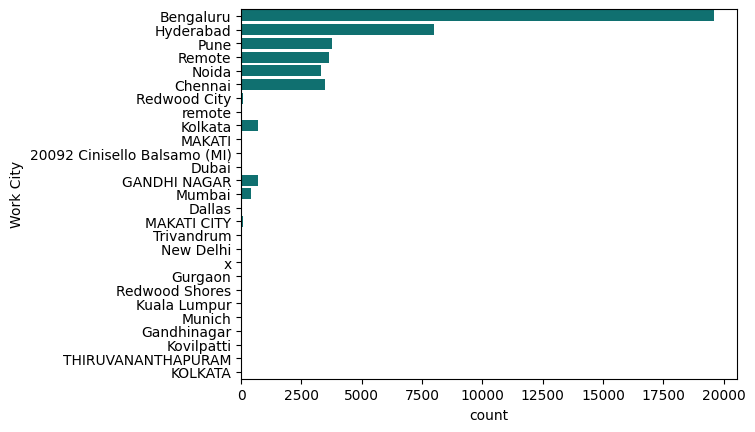

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(location, y = 'Work City', orient = 'h')

In [83]:
location['Work City'] = location['Work City'].replace(['Bangalore'], 'Bengaluru')
location['Work City'] = location['Work City'].replace(['BANGALORE'], 'Bengaluru')
location['Work City'] = location['Work City'].replace(['BLORE'], 'Bengaluru')
location['Work City'] = location['Work City'].replace(['BENGALURU'], 'Bengaluru')
location['Work City'] = location['Work City'].replace(['BLR'], 'Bengaluru')
location['Work City'] = location['Work City'].replace(['Bnagalore'], 'Bengaluru')
location['Work City'] = location['Work City'].replace(['HYDERABAD'], 'Hyderabad')
location['Work City'] = location['Work City'].replace(['MUMBAI'], 'Mumbai')

<Axes: xlabel='count', ylabel='Work City'>

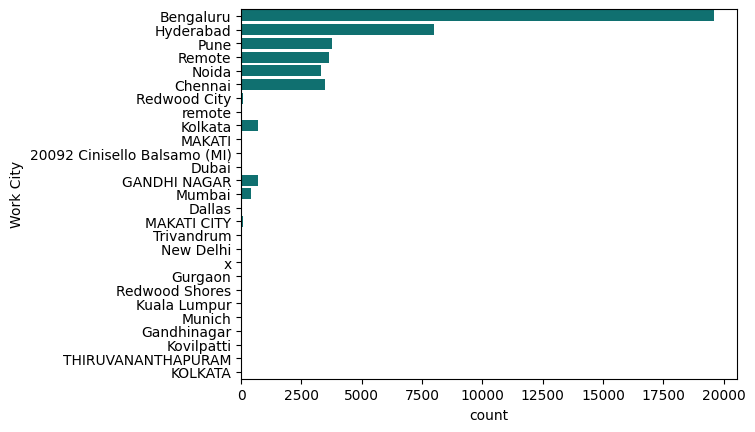

In [84]:
sns.countplot(location, y = 'Work City', orient = 'h')

In [85]:
location['Work City'] = location['Work City'].replace(['MAKATI CITY'], 'Makati')
location['Work City'] = location['Work City'].replace(['MAKATI'], 'Makati')
location['Work City'] = location['Work City'].replace(['THIRUVANANTHAPURAM'], 'Trivandrum')
location['Work City'] = location['Work City'].replace(['GANDHI NAGAR'], 'Gandhinagar')
location['Work City'] = location['Work City'].replace(['KOLKATA'], 'Kolkata')
location['Work City'] = location['Work City'].replace(['remote'], 'Remote')

<Axes: xlabel='count', ylabel='Work City'>

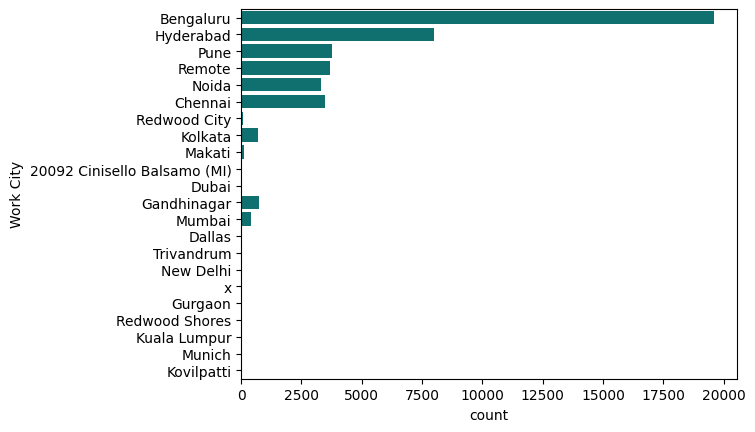

In [86]:
sns.countplot(location, y = 'Work City', orient = 'h')

In [87]:
location['Resource Email'].nunique()

3573

In [88]:
df = location

# Grouping by person and aggregating locations as a list
grouped = df.groupby('Resource Email')['Work City'].agg(lambda x: ', '.join(set(str(i) for i in x if pd.notna(i)))).reset_index()

print(grouped)
grouped.to_csv("Location.csv")

                         Resource Email  Work City
0         a.abhijeet.k.kumar@oracle.com  Bengaluru
1          a.abhishek.tiwari@oracle.com           
2             a.ankur.g.garg@oracle.com      Noida
3           a.ashish.agarwal@oracle.com           
4         a.ashok.padmanaban@oracle.com           
...                                 ...        ...
3568    zaheer.zaheer.ahamad@oracle.com  Hyderabad
3569           zahid.hasnain@oracle.com           
3570  zainab.murtaza.bharmal@oracle.com  Bengaluru
3571               zeba.sana@oracle.com  Hyderabad
3572            zia.s.shaikh@oracle.com  Bengaluru

[3573 rows x 2 columns]


In [89]:
non_billable_groubed_by_project = non_billable.groupby(['Consultant Mail ID','Fiscal Year','WorkTypeDescription-OPS']).agg({'Sum of Days': 'sum'}).reset_index()

In [90]:
non_billable_groubed_by_project

,Consultant Mail ID,Fiscal Year,WorkTypeDescription-OPS,Sum of Days
0,a.aasik@oracle.com,FY-22,Unassigned,91.0
1,a.aasik@oracle.com,FY-22,Vacation,19.0
2,a.aasik@oracle.com,FY-23,Unassigned,12.0
3,a.aasik@oracle.com,FY-23,Vacation,20.0
4,a.aasik@oracle.com,FY24,Unassigned,3.0
...,...,...,...,...
30074,zingade.shweta@oracle.com,FY24,Vacation,7.5
30075,ziyauddin.shaikh@oracle.com,FY-22,Unassigned,19.0
30076,ziyauddin.shaikh@oracle.com,FY-22,Vacation,5.0
30077,ziyauddin.shaikh@oracle.com,FY-23,Department Mgmt,3.0


In [91]:
nb = non_billable_groubed_by_project.groupby(['Consultant Mail ID','WorkTypeDescription-OPS']).agg({'Sum of Days': 'sum'}).reset_index()
print(nb.head())
# Assign project numbers for each consultant
nb['NBProject'] = nb.groupby('Consultant Mail ID').cumcount() + 1

              Consultant Mail ID WorkTypeDescription-OPS  Sum of Days
0             a.aasik@oracle.com              Unassigned       106.00
1             a.aasik@oracle.com                Vacation        39.00
2  a.abhijeet.k.kumar@oracle.com                Training        32.00
3  a.abhijeet.k.kumar@oracle.com                Vacation         3.00
4  a.abhinav.s.sharma@oracle.com              Unassigned        37.75


In [92]:
nb.to_csv("NB.csv")

In [93]:
nb['NBProject'].nunique()

8

In [94]:
df = pd.read_csv(r'project_mergeed_onsite.csv')

In [95]:
df

,Consultant Mail ID,Resource Primary Skill,utilization,Hire Date,Pillar,Domain 1,Level,Capacity Hours,Billable Hours,Separation Date,...,10,11,12,13,14,15,16,17,18,onsite_info
0,a.abhijeet.k.kumar@oracle.com,Global/CX/Functional Consultant,0.000000,2023-10-09,CX Retail,App,5,280.0,0.0,2024-05-22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0,2024-05-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,a.abhishek.tiwari@oracle.com,Global/SCM/Functional Consultant,0.602134,2023-10-05,ERP SCM,App,C,2624.0,1580.0,2024-05-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,a.ashish.agarwal@oracle.com,Global/ERP/Functional Consultant,0.868986,2021-09-02,ERP FIN,App,3,4656.0,4046.0,2024-05-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
4,a.ashok.padmanaban@oracle.com,Global/SCM/Functional Consultant,0.815584,2022-06-06,ERP SCM,App,5,3080.0,2512.0,2024-05-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,yugandhar.pulavarthi@oracle.com,Global/EPM/Technical Consultant,0.791971,2022-03-17,EPM,App,4,1096.0,868.0,2022-09-23,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3138,zaheer.zaheer.ahamad@oracle.com,Global/SCM/Technical Consultant,0.603791,2022-11-03,ERP SCM,App,5,2216.0,1338.0,2024-05-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3139,zeba.sana@oracle.com,Global/ERP/Technical Consultant,0.642308,2022-05-09,ERP FIN,Tech,3,1040.0,668.0,2024-05-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3140,zia.s.shaikh@oracle.com,Global/HCM/Technical Consultant,0.852857,2022-07-25,HCM,App,4,2800.0,2388.0,2024-05-22,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True


In [96]:
df = pd.read_csv(r'project_mergeed_onsite.csv')
df['Separation Date'] = pd.to_datetime(df['Separation Date'])

# Filter values for the years 2022 and 2023
filtered_df = df[df['Separation Date'].dt.year.isin([2022, 2023])]

# Group values by year and 'included' status, and count occurrences
grouped_df = filtered_df.groupby([filtered_df['Separation Date'].dt.year, 'Exit']).size().unstack(fill_value=0)
# Plotting bar graphs
print(grouped_df)


Exit             True
Separation Date      
2022              271
2023              321


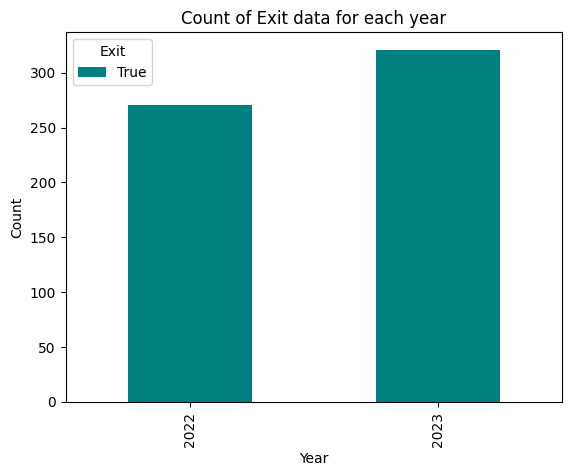

In [97]:
grouped_df.plot(kind='bar', stacked=True)

plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Exit data for each year')
plt.xticks(range(len(grouped_df.index)), grouped_df.index)
plt.legend(title='Exit')
plt.show()

In [98]:
billable

,Fiscal Year,Quarter,Month,Consultant Mail ID,Control,Project Number,Project Name,Work Type,Job Title,Level,...,Region,Sub Region,Cluster,Sub - Cluster,Pillar,Sub-Group,Domain1,Domain2,Hours,Days
0,FY-22,Q1,June,a.aasik@oracle.com,FY-22Q1a.aasik@oracle.comC,400155463,A3FFBM_TM_SD_Network Rail Infrastructure Limit...,CO-C Consulting Billable Projects Cost Transfer,8888.Contractor-Billable.N/A,C,...,EMEA Consulting Apps,UK-IE Consulting Apps,UK-IE Delivery,UK-IE Apps Delivery,CX Retail,Apps Delivery -RightNow,App,CX,152.0,19.00
1,FY-22,Q1,June,a.abhinav.s.sharma@oracle.com,FY-22Q1a.abhinav.s.sharma@oracle.comE,400129682,AQJ25_FP_JT International SA_TME Connect Italy...,CO-C Consulting Billable Projects Cost Transfer,20110.Associate Consultant.IC1,2,...,EMEA Consulting Apps,North Consulting Applications,DE-CH Consulting Apps,Apps Delivery - DE-CH,CX Retail,Apps Delivery -Fusion CRM,App,CX,40.0,5.00
2,FY-22,Q1,June,a.abhinav.s.sharma@oracle.com,FY-22Q1a.abhinav.s.sharma@oracle.comE,400152834,A3H8PD_TM_RM_BPCE SA_Move OCOD,CO-C Consulting Billable Projects Cost Transfer,20110.Associate Consultant.IC1,2,...,EMEA Consulting Apps,South Consulting Applications,France Consulting Apps,France Delivery Apps,CX Retail,Apps Delivery -Fusion CRM,App,CX,104.0,13.00
3,FY-22,Q1,June,a.ashok.padmanaban@oracle.com,FY-22Q1a.ashok.padmanaban@oracle.comE,300604351,JP/FPS/DENSO/G-FAST_PM_GT,CO-C Consulting Billable Projects Cost Transfer,20410.Senior Consultant.IC2,4,...,JAPAN,Japan,NaN,NaN,ERP SCM,SCM - SaaS,App,SCM,96.0,12.00
4,FY-22,Q1,June,a.ashok.padmanaban@oracle.com,FY-22Q1a.ashok.padmanaban@oracle.comE,400082934,963C3_HYB_First Distribution_MTN Rollout,CO-C Consulting Billable Projects Cost Transfer,20410.Senior Consultant.IC2,4,...,EMEA Consulting Apps,ECEMEA Consulting Apps,MEA Consulting Apps,Sub-Sahara Apps,ERP SCM,SCM - SaaS,App,SCM,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142170,FY-24,Q2,November,zainab.murtaza.bharmal@oracle.com,FY-24Q2zainab.murtaza.bharmal@oracle.comUS,400181690,SRV_BHE_ERP_FP_Global Build'_US-BO03,CO-C Consulting Billable Projects Cost Transfer,20410.Senior Consultant.IC2,4,...,NAAC,NAAC,NaN,NaN,ERP (GSD),FIN Cloud,App,ERP exGSD,128.0,16.00
142171,FY-24,Q2,November,zeba.sana@oracle.com,FY-24Q2zeba.sana@oracle.comPoland,400260094,A5GF3W_TM_Wipro_Fusion ERP Loc,CO-C Consulting Billable Projects Cost Transfer,20310.Staff Consultant.IC1,3,...,EMEA Consulting Apps,ECEMEA Consulting Apps,ECE-GR Apps,ECE Central Apps,ERP FIN,FIN Apps Tech,Tech,Integration - SaaS,74.0,9.25
142172,FY-24,Q2,November,zia.s.shaikh@oracle.com,FY-24Q2zia.s.shaikh@oracle.comCaribbean,400240031,PR_TM_Government of the Bahamas ERP EPM HCM,CO-C Consulting Billable Projects Cost Transfer,20410.Senior Consultant.IC2,4,...,LAD Apps,LAD Apps,NaN,NaN,HCM,HCM Cloud,App,HCM,132.0,16.50
142173,FY-24,Q2,November,zingade.shweta@oracle.com,FY-24Q2zingade.shweta@oracle.comUK,400272497,A5MW8W_TM_SD_Red Bull Technology Limited_Red B...,CF-C Consulting Contracted Free Services Non B...,20310.Staff Consultant.IC1,3,...,EMEA Consulting Apps,UK-IE Consulting Apps,UK-IE Delivery,UK-IE Apps Delivery,HCM,HCM Cloud,App,HCM,40.0,5.00


In [99]:
region = billable[['Consultant Mail ID','Region','Sub Region']]

In [100]:
region

,Consultant Mail ID,Region,Sub Region
0,a.aasik@oracle.com,EMEA Consulting Apps,UK-IE Consulting Apps
1,a.abhinav.s.sharma@oracle.com,EMEA Consulting Apps,North Consulting Applications
2,a.abhinav.s.sharma@oracle.com,EMEA Consulting Apps,South Consulting Applications
3,a.ashok.padmanaban@oracle.com,JAPAN,Japan
4,a.ashok.padmanaban@oracle.com,EMEA Consulting Apps,ECEMEA Consulting Apps
...,...,...,...
142170,zainab.murtaza.bharmal@oracle.com,NAAC,NAAC
142171,zeba.sana@oracle.com,EMEA Consulting Apps,ECEMEA Consulting Apps
142172,zia.s.shaikh@oracle.com,LAD Apps,LAD Apps
142173,zingade.shweta@oracle.com,EMEA Consulting Apps,UK-IE Consulting Apps


In [102]:
df = billable

# Grouping by person and aggregating locations as a list
grouped = df.groupby('Consultant Mail ID')[['Region','Sub Region']].agg(lambda x: ', '.join(set(str(i) for i in x if pd.notna(i)))).reset_index()

print(grouped)
grouped.to_csv("region.csv")

                   Consultant Mail ID  \
0                  a.aasik@oracle.com   
1       a.abhinav.s.sharma@oracle.com   
2        a.abhishek.tiwari@oracle.com   
3           a.ankur.g.garg@oracle.com   
4           a.anurag.kumar@oracle.com   
...                               ...   
5672             zeba.sana@oracle.com   
5673  zeeshan.ahmed.tabrez@oracle.com   
5674          zia.s.shaikh@oracle.com   
5675        zingade.shweta@oracle.com   
5676      ziyauddin.shaikh@oracle.com   

                                           Region  \
0                EMEA Consulting Apps, NAAC, XLOB   
1                      APAC, EMEA Consulting Apps   
2                            EMEA Consulting Apps   
3                                            NAAC   
4                                            NAAC   
...                                           ...   
5672         APAC, EMEA Consulting Apps, LAD Apps   
5673                                         NAAC   
5674               EMEA Consul

In [103]:
df = billable
counts = df.groupby(['Consultant Mail ID', 'Region','Sub Region']).size().reset_index(name='count')

# Find the region with the highest count for each mail_id
max_counts = counts.groupby('Consultant Mail ID')['count'].idxmax()

# Filter the DataFrame to keep only the rows with the highest count for each mail_id
result = counts.loc[max_counts]

# Drop the count column
region = result.drop(columns='count')
region.to_csv("region.csv", index=False)

In [104]:
# result["Consultant Mail ID"].nunique()
result

,Consultant Mail ID,Region,Sub Region,count
4,a.aasik@oracle.com,NAAC,NAAC,8
8,a.abhinav.s.sharma@oracle.com,EMEA Consulting Apps,South Consulting Applications,5
9,a.abhishek.tiwari@oracle.com,EMEA Consulting Apps,North Consulting Applications,16
10,a.ankur.g.garg@oracle.com,NAAC,NAAC,4
11,a.anurag.kumar@oracle.com,NAAC,NAAC,15
...,...,...,...,...
12593,zeba.sana@oracle.com,LAD Apps,LAD Apps,10
12594,zeeshan.ahmed.tabrez@oracle.com,NAAC,NAAC,7
12595,zia.s.shaikh@oracle.com,EMEA Consulting Apps,UK-IE Consulting Apps,15
12600,zingade.shweta@oracle.com,EMEA Consulting Apps,UK-IE Consulting Apps,30


In [105]:
df = pd.read_csv(r'NB.csv')
df['WorkTypeDescription-OPS'] = df['WorkTypeDescription-OPS'].replace('Presales', 'Investment')
df_filtered = df[df['WorkTypeDescription-OPS'].isin(['Training', 'Investment'])]
df_pivoted = df_filtered.pivot_table(index='Consultant Mail ID', columns='WorkTypeDescription-OPS', values='Sum of Days', aggfunc='sum')
df_pivoted = df_pivoted.fillna(0)
df_pivoted.reset_index(inplace=True)
df_pivoted.to_csv("training_and_investment.csv",index=False)

In [107]:
project_mergeed_onsite = pd.read_csv(r'project_mergeed_onsite.csv',index_col=False)

# project_mergeed_onsite.drop(columns=['Unnamed: 0'], inplace=True)
# print(project_mergeed_onsite)

region = pd.read_csv(r'region.csv',index_col=False)
# print(region)
project_mergeed_region = pd.merge(project_mergeed_onsite, region, on='Consultant Mail ID', how='outer')
project_mergeed_region.to_csv("project_mergeed_region.csv",index=False)

In [108]:
project_mergeed_region = pd.read_csv(r'project_mergeed_region.csv')
training_and_investment = pd.read_csv(r'training_and_investment.csv')
final = pd.merge(project_mergeed_region, training_and_investment, on='Consultant Mail ID', how='outer')
final.to_csv("final.csv",index=False)

In [109]:
import pandas as pd
final = pd.read_csv("final.csv")

In [110]:
final.describe()

,utilization,Capacity Hours,Billable Hours,diff_in_years,Max Count of Unique Project,1,2,3,4,5,...,11,12,13,14,15,16,17,18,Investment,Training
count,3142.000000,3142.000000,3142.000000,3142.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,...,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,3001.000000,4595.000000,4595.000000
mean,0.685770,2127.443666,1515.319096,1.610626,2.885705,117.151560,62.673419,33.227156,18.145512,9.253718,...,0.062396,0.068977,0.086529,0.067561,0.030990,0.028740,0.016078,0.008331,14.400184,31.107706
std,0.230495,1240.018030,1023.502325,0.785191,1.922481,103.116698,75.758728,53.129706,42.345374,28.134429,...,1.073653,1.482330,1.813819,1.432941,0.852635,0.931943,0.622697,0.322641,56.913825,48.289976
min,0.000000,24.000000,0.000000,0.000000,1.000000,11.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-138.500000,-101.750000
25%,0.574480,1040.000000,728.625000,0.945205,1.000000,36.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.747083,2176.000000,1380.000000,1.669863,2.000000,83.000000,36.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.500000
75%,0.851351,3040.000000,2200.000000,2.109589,4.000000,169.625000,91.000000,47.500000,15.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.265625,45.000000
max,1.314286,5200.000000,6547.000000,9.517808,18.000000,610.500000,554.500000,430.000000,386.500000,353.500000,...,24.125000,40.250000,60.125000,42.750000,25.000000,38.000000,24.125000,12.500000,589.500000,326.000000


In [111]:
final = final[final["Investment"] >= 0]

In [112]:
final = final[final["Training"] >= 0]

In [113]:
final.to_csv("finalNew.csv")

In [114]:
final.describe()


,utilization,Capacity Hours,Billable Hours,diff_in_years,Max Count of Unique Project,1,2,3,4,5,...,11,12,13,14,15,16,17,18,Investment,Training
count,2594.000000,2594.000000,2594.000000,2594.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,...,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000,2500.0,2500.0,4095.000000,4095.000000
mean,0.681258,2221.637625,1559.076943,1.653936,2.93440,116.883750,64.212192,33.701303,18.509373,9.630963,...,0.055600,0.073100,0.084570,0.061500,0.017700,0.0152,0.0,0.0,16.512140,36.591344
std,0.223677,1224.639759,1008.367335,0.765206,1.88391,101.879302,75.352949,52.133604,42.426132,29.095156,...,0.958965,1.587617,1.866961,1.409353,0.630929,0.7600,0.0,0.0,59.777423,47.481034
min,0.000000,24.000000,0.000000,0.000000,1.00000,11.500000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,0.000000
25%,0.568951,1040.000000,794.625000,1.065753,2.00000,36.093750,12.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,4.000000
50%,0.738196,2300.000000,1448.000000,1.734247,3.00000,82.500000,38.812500,11.562500,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.000000,16.000000
75%,0.844158,3080.000000,2232.000000,2.126027,4.00000,170.000000,92.562500,48.125000,16.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,3.000000,50.000000
max,1.308607,5200.000000,6547.000000,9.517808,16.00000,571.500000,554.500000,430.000000,386.500000,353.500000,...,23.000000,40.250000,60.125000,42.750000,25.000000,38.0000,0.0,0.0,589.500000,326.000000
